In [1]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import det

In [2]:
G = np.array([[4.27,7.43,0,0],[0,6.32,0,7.28],[5.57,0,5.07,8.21],
              [4.47,0,4.03,6.26],[0,4.47,7.28,5.59],[7.11,2.05,6.94,0]])
d = np.array([[5],[18/5],[47/5],[37/5],[29/5],[83/10]])
GT = np.transpose(G)
GTG = GT.dot(G)
GTG_inv = inv(GTG)
GTd = GT.dot(d)
m=GTG_inv.dot(GTd)
print(m)
print(np.mean(m))
print(np.mean(d))
d1=G.dot(m)
print(d1)

[[0.78291234]
 [0.19116109]
 [0.37641046]
 [0.36871088]]
0.4297986908075753
6.583333333333333
[[4.76336257]
 [3.89235327]
 [9.29633905]
 [7.32468239]
 [5.65585203]
 [8.57067554]]


In [3]:
e = d-d1
eT = np.transpose(e)
print(e)
print(np.mean(e))
print(eT.dot(e))

[[ 0.23663743]
 [-0.29235327]
 [ 0.10366095]
 [ 0.07531761]
 [ 0.14414797]
 [-0.27067554]]
-0.0005441406689256448
[[0.25192993]]


In [32]:
m0= np.array([[0.4297986908075753],[0.4297986908075753],[0.4297986908075753],[0.4297986908075753]])
d0=G.dot(m0)
print(d0)
pd = d-d0
print(pd)

[[5.02864468]
 [5.84526219]
 [8.10170532]
 [6.34382868]
 [7.4527093 ]
 [6.91975892]]
[[-0.02864468]
 [-2.24526219]
 [ 1.29829468]
 [ 1.05617132]
 [-1.6527093 ]
 [ 1.38024108]]
6.615318182679931


In [5]:
pm=GTG_inv.dot(GT.dot(pd))
print(pm)

[[ 0.35311364]
 [-0.2386376 ]
 [-0.05338823]
 [-0.06108781]]


In [67]:
#ep = ["0.1","100","500","1000"]
mest_all=[]
ep_all=[]
for i in [0.1,100,500,1000]:
    ep = np.eye(4)*[(i)**2]
    mest = inv(GTG + ep).dot(GTd)
    ep_all.append(ep)
    mest_all.append(mest)
mest_all

[array([[0.78281472],
        [0.19117201],
        [0.37645308],
        [0.36870118]]),
 array([[0.01604937],
        [0.00988774],
        [0.01709797],
        [0.01750632]]),
 array([[0.00066232],
        [0.00041071],
        [0.00070818],
        [0.00072734]]),
 array([[0.00016574],
        [0.0001028 ],
        [0.00017724],
        [0.00018205]])]

In [49]:
y_all=[]
for i in [0.1,100,500,1000]:
    y = eT.dot(e)+[(i)**2]*np.transpose(m).dot(m)
    y_all.append(y)
print(y_all)   

[array([[0.2612012]]), array([[9271.5202609]]), array([[231781.96020416]]), array([[927127.08502686]])]


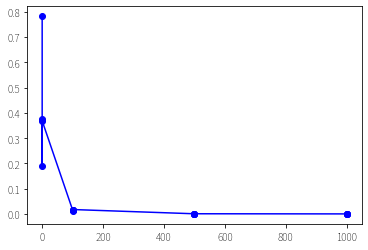

In [80]:
import matplotlib.pyplot as plt
import numpy as np

x= [0.78281472,0.19117201,0.37645308,0.36870118,0.01604937,0.00988774,0.01709797,0.01750632,0.00066232,0.00041071,0.00070818,0.00072734,0.00016574,0.0001028,0.00017724,0.00018205]
y= [0.1,0.1,0.1,0.1,100,100,100,100,500,500,500,500,1000,1000,1000,1000]
plt.plot(y,x,'b-o')
plt.savefig('fig1.png')
plt.show()

In [81]:
ep1 = np.eye(4)*[(0.1)**2]
mest1 = inv(GTG + ep1).dot(GTd)
print(mest1)
ep2 = np.eye(4)*[(100)**2]
mest2 = inv(GTG + ep2).dot(GTd)
print(mest2)
ep3 = np.eye(4)*[(500)**2]
mest3 = inv(GTG + ep3).dot(GTd)
print(mest3)
ep4 = np.eye(4)*[(1000)**2]
mest4 = inv(GTG + ep4).dot(GTd)
print(mest4)

[[0.78281472]
 [0.19117201]
 [0.37645308]
 [0.36870118]]
[[0.01604937]
 [0.00988774]
 [0.01709797]
 [0.01750632]]
[[0.00066232]
 [0.00041071]
 [0.00070818]
 [0.00072734]]
[[0.00016574]
 [0.0001028 ]
 [0.00017724]
 [0.00018205]]


In [7]:
'''
#def getMArtixCofactor(mm,i,j):
#    c = mm[:]
#    c_r = np.delete(c,(i),axis=0)
#    c_c = np.delete(c_r,(j),axis=1)
#    return(-1**(i+j))*det(c_c)
#sta = [6,14],[17,3],[3,4]
#env = [17,18],[13,16],[1,13],[13,1],[19,12],[11,18]
#tt = [5],[18/5],[47/5],[37/5],[29/5],[83/5]
#[4,11],[4,14],[10,16],[7,13],[8,16],[8,14]
#x1, y1 = 10,16.2
#x2, y2 = 11,18 
#distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
#print(distance)
#GTG_det = det(GTG)
#GTG_inv = inv(GTG)
#m1=1/GTG_inv.dot(GTd)
#for i in range(4):
#    for j in range(4):
#        GTG_adj[j,i]=getMArtixCofactor(GTG,i,j)
ep1 = np.eye(4)*[(0.1)**2]
mest1 = inv(GTG + ep1).dot(GTd)
print(mest1)
ep2 = np.eye(4)*[(100)**2]
mest2 = inv(GTG + ep2).dot(GTd)
print(mest2)
ep3 = np.eye(4)*[(500)**2]
mest3 = inv(GTG + ep3).dot(GTd)
print(mest3)
ep4 = np.eye(4)*[(1000)**2]
mest4 = inv(GTG + ep4).dot(GTd)
print(mest4)
#import matplotlib.pyplot as plt
#import numpy as np
#plt.plot(ep1, mest1, 'b-o') 
#plt.savefig('fig1.png')
#plt.show()
#np.plt(ep4, mest4)
'''

"\n#def getMArtixCofactor(mm,i,j):\n#    c = mm[:]\n#    c_r = np.delete(c,(i),axis=0)\n#    c_c = np.delete(c_r,(j),axis=1)\n#    return(-1**(i+j))*det(c_c)\n#sta = [6,14],[17,3],[3,4]\n#env = [17,18],[13,16],[1,13],[13,1],[19,12],[11,18]\n#tt = [5],[18/5],[47/5],[37/5],[29/5],[83/5]\n#[4,11],[4,14],[10,16],[7,13],[8,16],[8,14]\n#x1, y1 = 10,16.2\n#x2, y2 = 11,18 \n#distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)\n#print(distance)\n#GTG_det = det(GTG)\n#GTG_inv = inv(GTG)\n#m1=1/GTG_inv.dot(GTd)\n#for i in range(4):\n#    for j in range(4):\n#        GTG_adj[j,i]=getMArtixCofactor(GTG,i,j)\n#ep1 = np.eye(4)*[(0.1)**2]\n#mest1 = inv(GTG + ep1).dot(GTd)\n#print(mest1)\n#ep2 = np.eye(4)*[(100)**2]\n#mest2 = inv(GTG + ep2).dot(GTd)\n#print(mest2)\n#ep3 = np.eye(4)*[(500)**2]\n#mest3 = inv(GTG + ep3).dot(GTd)\n#print(mest3)\nep4 = np.eye(4)*[(1000)**2]\nmest4 = inv(GTG + ep4).dot(GTd)\nprint(mest4)\nimport matplotlib.pyplot as plt\nimport numpy as np\n#plt.plot(ep1, mest1, 'b-o') \n#plt.sa